In [1]:
# Import required modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset from a CSV file (replace 'your_dataset.csv' with your actual file name)
data = pd.read_csv('TrainingDataStand.csv')

# Separate input features and output feature
X = data.iloc[:, :4].values  
y = data.iloc[:, 4].values  

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the FNN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='tanh')  # Output in range [-1, 1]
    # Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # Dense(64, activation='relu'),
    # Dense(32, activation='relu'),
    # Dense(1, activation='tanh')  # Output in range [-1, 1]
])

C:\Users\Saian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Specify callback for logging in-epoch loss
from tensorflow.keras.callbacks import Callback
class BatchLossLogger(Callback):
    def on_train_begin(self, logs=None):
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs.get('loss'))

# Instantiate the callback
batch_loss_logger = BatchLossLogger()

In [ ]:
# Start the timer
start_time = time.time()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=65536,
    verbose=1,
    callbacks=[batch_loss_logger]
)

# Stop the timer
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training Time: {elapsed_time:.2f} seconds")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0012 - mae: 0.0226 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0012 - val_mae: 0.0225
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.001

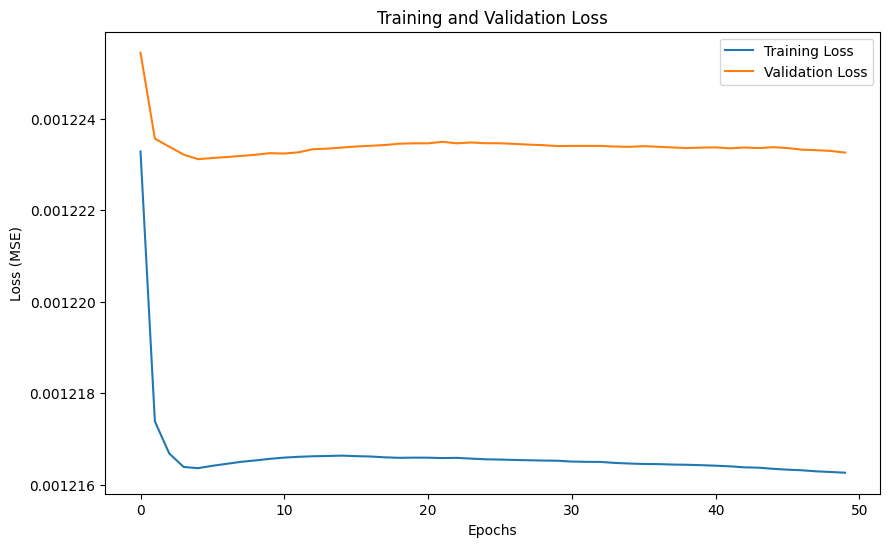

3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 855us/step


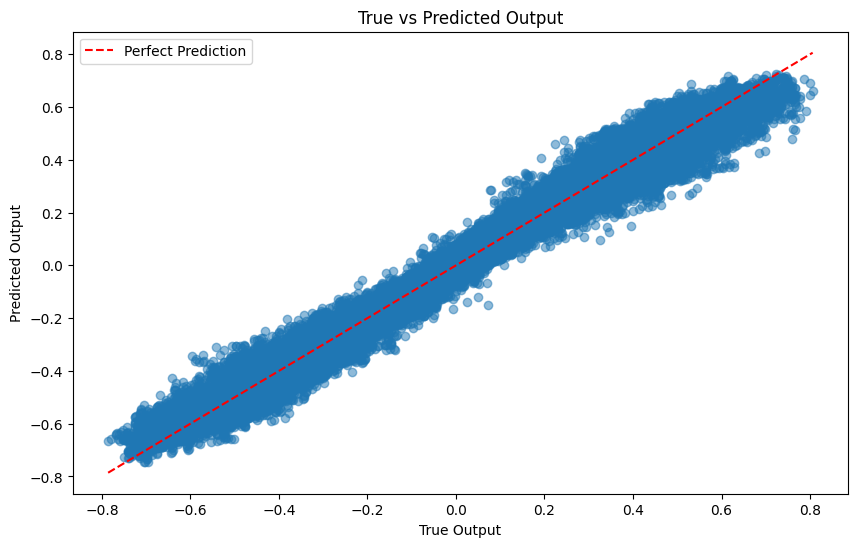

In [23]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Predict on test set and visualize results
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs Predicted Output')
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()

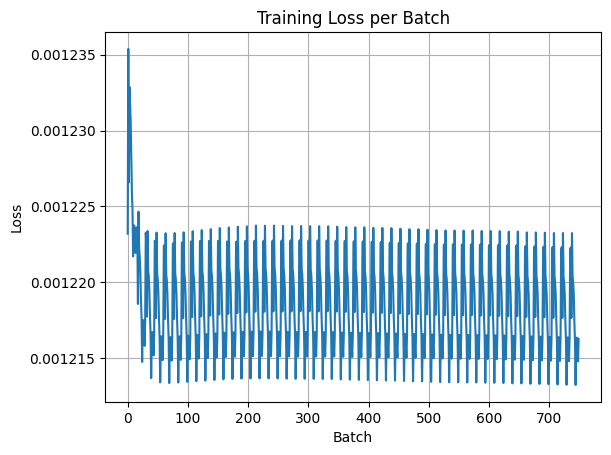

In [24]:
# Plot batch loss
plt.plot(batch_loss_logger.batch_losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss per Batch')
plt.grid(True)
plt.show()

In [36]:
# Export the model
model.export("SteeringModel_Iteration74_SUZ")

INFO:tensorflow:Assets written to: SteeringModel_Iteration74_SUZ\assets


INFO:tensorflow:Assets written to: SteeringModel_Iteration74_SUZ\assets


Saved artifact at 'SteeringModel_Iteration74_SUZ'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_9')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2855844151760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855844163856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855844164624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855844156752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855813704080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855813696016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855813697552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2855813703312: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
# Feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error')
feature_importance = result.importances_mean
print("Feature Importance:", feature_importance)

3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 887us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 819us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 872us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 816us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 864us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 864us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 863us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 881us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 886us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 817us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 827us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 856us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 866us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 863us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step
3242/3242 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3242/3242 ━━━━